In [2]:
import matplotlib.pyplot as plt
# plt.interactive(False)
from scipy.stats import gaussian_kde
from scipy.special import kl_div
import numpy as np
import pickle
legend_properties = {'weight':'bold'}
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"
# Red and Blue
strong_red = "#A61C5D"
strong_blue = "#1B64A4"

# Shallow-deep pair
shallow_purple = "#EAD7EA"
deep_purple = "#BA9DB9"
shallow_cyan = "#A9D5E0"
deep_cyan = "#48C0BF"
shallow_blue = "#B6DAEC"
deep_blue = "#98CFE4"
shallow_pink = "#F5E0E5"
deep_pink = "#E5A7B6"
shallow_green = "#C2DED0"
deep_green = "#A5C6B1"

color_pairs = [[shallow_purple, deep_purple],  [shallow_green, deep_green],
               [shallow_blue, deep_blue], [shallow_pink, deep_pink], [shallow_cyan, deep_cyan],
               [shallow_grey, deep_grey]]
morandi_colors = [morandi_blue, morandi_green, morandi_yellow, morandi_orange, morandi_pink, morandi_red, morandi_purple]


In [4]:
data_folder = r"E:\data\gst-0723-23\Baseline\Alpha_2"
alpha_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

g_performance_across_alpha, s_performance_across_alpha = [], []
g_variance_across_alpha, s_variance_across_alpha = [], []
for alpha in alpha_list:
    g_performance_file = data_folder + r"\g_performance_across_K_alpha_{0}".format(alpha)
    s_performance_file = data_folder + r"\s_performance_across_K_alpha_{0}".format(alpha)

    g_first_quantile_file = data_folder + r"\g_first_quantile_across_K_alpha_{0}".format(alpha)
    s_first_quantile_file = data_folder + r"\s_first_quantile_across_K_alpha_{0}".format(alpha)

    g_last_quantile_file = data_folder + r"\g_last_quantile_across_K_alpha_{0}".format(alpha)
    s_last_quantile_file = data_folder + r"\s_last_quantile_across_K_alpha_{0}".format(alpha)

    g_cog_performance_file = data_folder + r"\g_cog_performance_across_K_time_alpha_{0}".format(alpha)
    s_cog_performance_file = data_folder + r"\s_cog_performance_across_K_time_alpha_{0}".format(alpha)

    g_variance_file = data_folder + r"\g_variance_across_K_alpha_{0}".format(alpha)
    s_variance_file = data_folder + r"\s_variance_across_K_alpha_{0}".format(alpha)

    g_performance_time_file = data_folder + r"\g_performance_across_K_time_alpha_{0}".format(alpha)
    s_performance_time_file = data_folder + r"\s_performance_across_K_time_alpha_{0}".format(alpha)

    with open(g_performance_file, 'rb') as infile:
        g_fitness = pickle.load(infile)
    with open(s_performance_file, 'rb') as infile:
        s_fitness = pickle.load(infile)

    with open(g_first_quantile_file, 'rb') as infile:
        g_first = pickle.load(infile)
    with open(s_first_quantile_file, 'rb') as infile:
        s_first = pickle.load(infile)

    with open(g_last_quantile_file, 'rb') as infile:
        g_last = pickle.load(infile)
    with open(s_last_quantile_file, 'rb') as infile:
        s_last = pickle.load(infile)

    with open(g_cog_performance_file, 'rb') as infile:
        g_cog_fitness = pickle.load(infile)
    with open(s_cog_performance_file, 'rb') as infile:
        s_cog_fitness = pickle.load(infile)

    with open(g_variance_file, 'rb') as infile:
        g_variance = pickle.load(infile)
    with open(s_variance_file, 'rb') as infile:
        s_variance = pickle.load(infile)

    with open(g_performance_time_file, 'rb') as infile:
        g_performance_time = pickle.load(infile)
    with open(s_performance_time_file, 'rb') as infile:
        s_performance_time = pickle.load(infile)

    g_performance_across_alpha.append(g_fitness)
    s_performance_across_alpha.append(s_first)

    g_variance_across_alpha.append(g_variance)
    s_variance_across_alpha.append(s_variance)

print(np.array(g_performance_across_alpha).shape)
print(g_performance_across_alpha)

(9, 9)
[[0.7720182180716582, 0.7308046795899471, 0.710898695755675, 0.7083500713220474, 0.702054508024697, 0.695764382169651, 0.6889604884306574, 0.6812649771239978, 0.6751272333827203], [0.7298349708974824, 0.7005212070346366, 0.6863896724682989, 0.6765587008573823, 0.6693779953130157, 0.665771428227367, 0.6597581964336736, 0.6552362366042566, 0.6512051356265072], [0.6885079168728709, 0.666466272690744, 0.6578328485096547, 0.651645268652131, 0.6505257746143319, 0.6426358498735989, 0.6399259721329559, 0.6373060606878492, 0.6295054514652593], [0.6669533789381122, 0.6418558307292562, 0.6381790748053987, 0.6341281066549087, 0.6310301615576238, 0.6269294771539619, 0.6218471079826404, 0.6187074931504822, 0.6154084858720417], [0.6443745914951962, 0.6263377554844073, 0.6219106492412888, 0.6189972642918088, 0.6145713496665172, 0.6129849483997692, 0.6098022214695085, 0.6072525573275411, 0.6002698360189082], [0.621712335507886, 0.6135470787989132, 0.6116906531462377, 0.6053067229919326, 0.605475

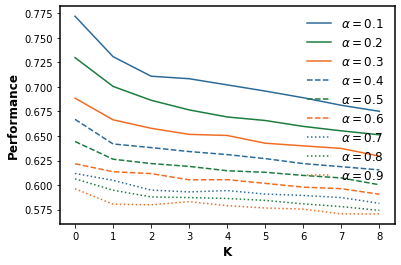

In [11]:
# GST Fitness
x = range(len(g_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, g_performance_across_alpha[0], "-", label="$\\alpha=0.1$", color=nature_blue)
plt.plot(x, g_performance_across_alpha[1], "-", label="$\\alpha=0.2$", color=nature_green)
plt.plot(x, g_performance_across_alpha[2], "-", label="$\\alpha=0.3$", color=nature_orange)

plt.plot(x, g_performance_across_alpha[3], "--", label="$\\alpha=0.4$", color=nature_blue)
plt.plot(x, g_performance_across_alpha[4], "--", label="$\\alpha=0.5$", color=nature_green)
plt.plot(x, g_performance_across_alpha[5], "--", label="$\\alpha=0.6$", color=nature_orange)

plt.plot(x, g_performance_across_alpha[6], ":", label="$\\alpha=0.7$", color=nature_blue)
plt.plot(x, g_performance_across_alpha[7], ":", label="$\\alpha=0.8$", color=nature_green)
plt.plot(x, g_performance_across_alpha[8], ":", label="$\\alpha=0.9$", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, fontsize=12)
plt.savefig(data_folder + r"\G_performance_across_alpha.png", transparent=True, dpi=300)
plt.show()
# plt.clf()

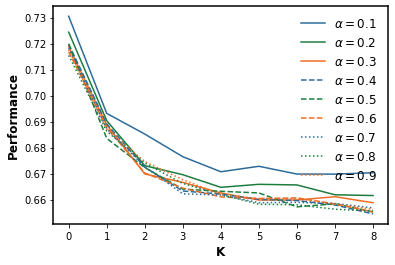

In [10]:
# GST Fitness
x = range(len(g_fitness))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)
plt.plot(x, s_performance_across_alpha[0], "-", label="$\\alpha=0.1$", color=nature_blue)
plt.plot(x, s_performance_across_alpha[1], "-", label="$\\alpha=0.2$", color=nature_green)
plt.plot(x, s_performance_across_alpha[2], "-", label="$\\alpha=0.3$", color=nature_orange)

plt.plot(x, s_performance_across_alpha[3], "--", label="$\\alpha=0.4$", color=nature_blue)
plt.plot(x, s_performance_across_alpha[4], "--", label="$\\alpha=0.5$", color=nature_green)
plt.plot(x, s_performance_across_alpha[5], "--", label="$\\alpha=0.6$", color=nature_orange)

plt.plot(x, s_performance_across_alpha[6], ":", label="$\\alpha=0.7$", color=nature_blue)
plt.plot(x, s_performance_across_alpha[7], ":", label="$\\alpha=0.8$", color=nature_green)
plt.plot(x, s_performance_across_alpha[8], ":", label="$\\alpha=0.9$", color=nature_orange)

plt.xlabel('K', fontweight='bold', fontsize=12)
plt.ylabel('Performance', fontweight='bold', fontsize=12)
plt.xticks(x)
plt.legend(frameon=False, fontsize=12)
plt.savefig(data_folder + r"\S_performance_across_alpha.png", transparent=True, dpi=300)
plt.show()
# plt.clf()